<a href="https://colab.research.google.com/github/VamBay/HW1_DS4BME_YUANWEI_XU/blob/master/Class_Project_2_Yuanwei_Xu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project 2**

Get the country-specific covid case data from [here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv). (Note pandas allows you to load a csv file from a URL. Make sure to use the "raw" link to the file on github.)

1. Pick four countries. Show the time series plot of new cases per day for the four countries from the day of the first nonzero case day. (Note we do not want to show cumulative cases by day.) 
2. Plot a smoothed version of the country specific data by convolving the data with a box kernel of length 20 days, that is, $k(d) = I(d \leq 20) / 20$ for $d=0,1,\ldots$. (This is a 20 day moving average smooth.) 
3. Let $e$ be the difference between your observed case counts and the smoothed version. Plot both $e$ and the power spectrum plot of $e$ for each of the four countries. Describe this plot and what is shows.


>  **Answer** *The power spectrum shows at which frequencies variations are strong and at which frequencies variations are weak.*





4. From the same website, download the daily death data. Calculate the overall case fatality rate = total deaths / total cases. 


> **Answer** __0.032295__ *(Calculations specified below)*



5. For your four countries, plot the estimate of the case fatality rate at that day in the outbreak, starting from the day of the first case. That is, for day $d$ plot the number of deaths divided by the number of cases occuring up to day $d$. Add a horizontal line at the estimate from the furtherst day recorded.

Create your report in a colab document and check the document into the github classroom repository for project 2. (Make sure to actually run the colab document so that the figures and results are present.) 


**Import Modules**


In [1]:
#Import Modules
import numpy as np
from scipy import stats as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Fetch COVID-19 Data**

In [2]:
#Fetch COVID-19 Confirmed Cases Data
! if [ ! -e GlobalCOVID.csv ] ; \
  then wget https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv; \
fi

--2020-09-14 14:15:13--  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 258588 (253K) [text/plain]
Saving to: ‘time_series_covid19_confirmed_global.csv’

time_series_covid19 100%[===================>] 252.53K  --.-KB/s    in 0.05s   

2020-09-14 14:15:13 (4.53 MB/s) - ‘time_series_covid19_confirmed_global.csv’ saved [258588/258588]



**Read Data in pandas**

In [3]:
#Read data in pandas
df = pd.read_csv("time_series_covid19_confirmed_global.csv")
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,36829,36896,37015,37054,37054,37162,37269,37345,37424,37431,37551,37596,37599,37599,37599,37856,37894,37953,37999,38054,38070,38113,38129,38140,38143,38162,38165,38196,38243,38288,38304,38324,38398,38494,38520,38544,38572,38606,38641,38716
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5889,6016,6151,6275,6411,6536,6676,6817,6971,7117,7260,7380,7499,7654,7812,7967,8119,8275,8427,8605,8759,8927,9083,9195,9279,9380,9513,9606,9728,9844,9967,10102,10255,10406,10553,10704,10860,11021,11185,11353
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,33055,33626,34155,34693,35160,35712,36204,36699,37187,37664,38133,38583,39025,39444,39847,40258,40667,41068,41460,41858,42228,42619,43016,43403,43781,44146,44494,44833,45158,45469,45773,46071,46364,46653,46938,47216,47488,47752,48007,48254
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,939,944,955,955,955,963,963,977,981,989,989,989,1005,1005,1024,1024,1045,1045,1045,1060,1060,1098,1098,1124,1124,1124,1176,1184,1199,1199,1215,1215,1215,1261,1261,1301,1301,1344,1344,1344
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1395,1483,1538,1572,1672,1679,1735,1762,1815,1852,1879,1906,1935,1966,2015,2044,2068,2134,2171,2222,2283,2332,2415,2471,2551,2624,2654,2729,2777,2805,2876,2935,2965,2981,3033,3092,3217,3279,3335,3388


**Arrange Data**

In [4]:
df = df.drop(['Province/State', 'Lat', 'Long'],\
               axis = 1)
df.head(10)

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,36829,36896,37015,37054,37054,37162,37269,37345,37424,37431,37551,37596,37599,37599,37599,37856,37894,37953,37999,38054,38070,38113,38129,38140,38143,38162,38165,38196,38243,38288,38304,38324,38398,38494,38520,38544,38572,38606,38641,38716
1,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5889,6016,6151,6275,6411,6536,6676,6817,6971,7117,7260,7380,7499,7654,7812,7967,8119,8275,8427,8605,8759,8927,9083,9195,9279,9380,9513,9606,9728,9844,9967,10102,10255,10406,10553,10704,10860,11021,11185,11353
2,Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,...,33055,33626,34155,34693,35160,35712,36204,36699,37187,37664,38133,38583,39025,39444,39847,40258,40667,41068,41460,41858,42228,42619,43016,43403,43781,44146,44494,44833,45158,45469,45773,46071,46364,46653,46938,47216,47488,47752,48007,48254
3,Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,939,944,955,955,955,963,963,977,981,989,989,989,1005,1005,1024,1024,1045,1045,1045,1060,1060,1098,1098,1124,1124,1124,1176,1184,1199,1199,1215,1215,1215,1261,1261,1301,1301,1344,1344,1344
4,Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1395,1483,1538,1572,1672,1679,1735,1762,1815,1852,1879,1906,1935,1966,2015,2044,2068,2134,2171,2222,2283,2332,2415,2471,2551,2624,2654,2729,2777,2805,2876,2935,2965,2981,3033,3092,3217,3279,3335,3388
5,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,92,92,92,92,92,92,92,92,92,93,93,93,93,93,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,95,95,95,95,95,95,95,95,95,95,95
6,Argentina,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,220682,228195,235677,241811,246499,253868,260911,268574,276072,282437,289100,294569,299126,305966,312659,320884,329043,336802,342154,350867,359638,370188,380292,392009,401239,408426,417735,428239,439172,451198,461882,471806,478792,488007,500034,512293,524198,535705,546481,555537
7,Armenia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,39586,39819,39985,40185,40410,40433,40593,40794,41023,41299,41495,41663,41701,41846,42056,42319,42477,42616,42792,42825,42936,43067,43270,43451,43626,43750,43781,43878,44075,44271,44461,44649,44783,44845,44953,45152,45326,45503,45675,45862
8,Australia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113
9,Australia,0,0,0,0,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,...,3832,3842,3851,3861,3875,3897,3915,3927,3936,3945,3950,3957,3959,3966,3971,3972,3981,3985,3988,3991,3997,4006,4019,4033,4040,4050,4063,4079,4091,4099,4104,4114,4118,4126,4135,4142,4152,4157,4166,4170


In [5]:
df.set_index("Country/Region", inplace = True)
df.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,36829,36896,37015,37054,37054,37162,37269,37345,37424,37431,37551,37596,37599,37599,37599,37856,37894,37953,37999,38054,38070,38113,38129,38140,38143,38162,38165,38196,38243,38288,38304,38324,38398,38494,38520,38544,38572,38606,38641,38716
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5889,6016,6151,6275,6411,6536,6676,6817,6971,7117,7260,7380,7499,7654,7812,7967,8119,8275,8427,8605,8759,8927,9083,9195,9279,9380,9513,9606,9728,9844,9967,10102,10255,10406,10553,10704,10860,11021,11185,11353
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,33055,33626,34155,34693,35160,35712,36204,36699,37187,37664,38133,38583,39025,39444,39847,40258,40667,41068,41460,41858,42228,42619,43016,43403,43781,44146,44494,44833,45158,45469,45773,46071,46364,46653,46938,47216,47488,47752,48007,48254
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,939,944,955,955,955,963,963,977,981,989,989,989,1005,1005,1024,1024,1045,1045,1045,1060,1060,1098,1098,1124,1124,1124,1176,1184,1199,1199,1215,1215,1215,1261,1261,1301,1301,1344,1344,1344
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1395,1483,1538,1572,1672,1679,1735,1762,1815,1852,1879,1906,1935,1966,2015,2044,2068,2134,2171,2222,2283,2332,2415,2471,2551,2624,2654,2729,2777,2805,2876,2935,2965,2981,3033,3092,3217,3279,3335,3388


In [6]:
df = df.T
df.head(10)

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,...,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0,7,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,0,0,8,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
1/27/20,0,0,0,0,0,0,0,0,0,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,5,0,0,8,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
1/28/20,0,0,0,0,0,0,0,0,0,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,8,0,0,14,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
1/29/20,0,0,0,0,0,0,0,0,0,4,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,8,0,0,14,0,0,0,0,0,5,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
1/30/20,0,0,0,0,0,0,0,0,0,4,0,3,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,9,0,0,14,0,0,0,0,0,5,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
1/31/20,0,0,0,0,0,0,0,0,0,4,0,2,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,10,0,0,19,0,0,0,0,0,7,0,0,4,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0,0,0


**Four Countries Choosen for Analysis: US, China, UK, Thailand**
We could see that after dropping the "Province/State" index, there are more than one column denoting the same country/region.
Thus we need to obtain the overall cumulative cases for each country first.

In [7]:
df[['US', 'China', 'United Kingdom', 'Thailand']]

Country/Region,US,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,Thailand
1/22/20,1,1,14,6,1,0,26,2,1,4,1,0,5,0,444,4,0,1,2,0,2,1,1,0,0,2,9,1,5,4,0,0,1,10,0,0,0,0,0,0,0,0,0,0,0,2
1/23/20,1,9,22,9,5,2,32,5,3,5,1,2,5,2,444,9,0,5,7,1,3,2,1,0,3,6,16,1,8,4,0,2,2,27,0,0,0,0,0,0,0,0,0,0,0,3
1/24/20,2,15,36,27,10,2,53,23,3,8,2,4,9,2,549,24,1,9,18,3,4,2,2,0,5,15,20,1,15,8,0,2,5,43,0,0,0,0,0,0,0,0,0,0,0,5
1/25/20,2,39,41,57,18,4,78,23,4,19,8,9,32,5,761,43,7,18,18,4,17,2,3,1,15,27,33,6,28,10,0,3,11,62,0,0,0,0,0,0,0,0,0,0,0,7
1/26/20,5,60,68,75,35,7,111,36,5,22,13,15,83,8,1058,69,7,33,36,4,21,5,4,1,22,46,40,9,44,14,0,4,16,104,0,0,0,0,0,0,0,0,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9/9/20,6360212,991,935,584,387,170,1770,257,147,171,365,948,1276,4901,68139,1019,261,665,935,157,263,46,75,18,378,831,929,203,664,233,1,902,201,1278,3,177,63,207,631,13,322,337,13,628,355219,3454
9/10/20,6396100,991,935,584,387,170,1774,257,147,171,365,948,1276,4913,68139,1019,261,665,935,157,264,46,75,18,379,831,937,203,665,233,1,902,201,1278,3,177,63,208,631,13,323,337,13,638,358138,3461
9/11/20,6443652,991,935,584,388,170,1776,257,147,171,365,948,1276,4925,68139,1019,261,665,935,157,264,46,75,18,380,831,939,203,665,233,1,902,201,1278,3,177,63,208,633,13,323,337,13,641,361677,3461
9/12/20,6485123,991,935,584,388,170,1777,258,147,171,365,948,1277,4938,68139,1019,261,665,935,157,264,46,75,18,381,831,942,203,665,234,1,902,201,1280,3,177,66,208,633,13,327,337,13,641,365174,3473


In [8]:
df_US = df[['US']]
df_US[['US']]
df_US.head()

Country/Region,US
1/22/20,1
1/23/20,1
1/24/20,2
1/25/20,2
1/26/20,5


In [9]:
US_cumulative = df_US.sum(axis=1)
print (US_cumulative)

1/22/20          1
1/23/20          1
1/24/20          2
1/25/20          2
1/26/20          5
            ...   
9/9/20     6360212
9/10/20    6396100
9/11/20    6443652
9/12/20    6485123
9/13/20    6519573
Length: 236, dtype: int64


In [11]:
df_China = df[['China']]
df_China[['China']]
df_China.head()

Country/Region,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China
1/22/20,1,14,6,1,0,26,2,1,4,1,0,5,0,444,4,0,1,2,0,2,1,1,0,0,2,9,1,5,4,0,0,1,10
1/23/20,9,22,9,5,2,32,5,3,5,1,2,5,2,444,9,0,5,7,1,3,2,1,0,3,6,16,1,8,4,0,2,2,27
1/24/20,15,36,27,10,2,53,23,3,8,2,4,9,2,549,24,1,9,18,3,4,2,2,0,5,15,20,1,15,8,0,2,5,43
1/25/20,39,41,57,18,4,78,23,4,19,8,9,32,5,761,43,7,18,18,4,17,2,3,1,15,27,33,6,28,10,0,3,11,62
1/26/20,60,68,75,35,7,111,36,5,22,13,15,83,8,1058,69,7,33,36,4,21,5,4,1,22,46,40,9,44,14,0,4,16,104


In [13]:
China_cumulative = df_China.sum(axis=1)
print (China_cumulative)

1/22/20      548
1/23/20      643
1/24/20      920
1/25/20     1406
1/26/20     2075
           ...  
9/9/20     90100
9/10/20    90127
9/11/20    90145
9/12/20    90168
9/13/20    90197
Length: 236, dtype: int64


In [14]:
df_UK = df[['United Kingdom']]
df_UK[['United Kingdom']]
df_UK.head()

Country/Region,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom
1/22/20,0,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0,0


In [16]:
UK_cumulative = df_UK.sum(axis=1)
print (UK_cumulative)

1/22/20         0
1/23/20         0
1/24/20         0
1/25/20         0
1/26/20         0
            ...  
9/9/20     357613
9/10/20    360544
9/11/20    364088
9/12/20    367592
9/13/20    370930
Length: 236, dtype: int64


In [19]:
df_THAI = df[['Thailand']]
df_THAI[['Thailand']]
df_THAI.head()

Country/Region,Thailand
1/22/20,2
1/23/20,3
1/24/20,5
1/25/20,7
1/26/20,8


In [20]:
THAI_cumulative = df_THAI.sum(axis=1)
print (THAI_cumulative)

1/22/20       2
1/23/20       3
1/24/20       5
1/25/20       7
1/26/20       8
           ... 
9/9/20     3454
9/10/20    3461
9/11/20    3461
9/12/20    3473
9/13/20    3475
Length: 236, dtype: int64


**Concatenating Overall Cumulative Cases for 4 Choosen Countries**

In [21]:
df_4countries = pd.concat([US_cumulative,China_cumulative,UK_cumulative,THAI_cumulative], axis=1)

df_4countries.head(10) 

,0,1,2,3
1/22/20,1,548,0,2
1/23/20,1,643,0,3
1/24/20,2,920,0,5
1/25/20,2,1406,0,7
1/26/20,5,2075,0,8
1/27/20,5,2877,0,8
1/28/20,5,5509,0,14
1/29/20,5,6087,0,14
1/30/20,5,8141,0,14
1/31/20,7,9802,2,19


In [22]:
df_4countries.rename(columns={0:'US', 1:'China', 2:'UK', 3:'Thailand'}, inplace=True)
df_4countries.tail(10)

,US,China,UK,Thailand
9/4/20,6200518,90008,344686,3431
9/5/20,6244970,90025,346513,3444
9/6/20,6276365,90058,349500,3445
9/7/20,6300622,90078,352451,3446
9/8/20,6327009,90087,354932,3447
9/9/20,6360212,90100,357613,3454
9/10/20,6396100,90127,360544,3461
9/11/20,6443652,90145,364088,3461
9/12/20,6485123,90168,367592,3473
9/13/20,6519573,90197,370930,3475


**Calculating Daily New Cases**

In [23]:
df_4countries_daily = df_4countries.diff()
df_4countries_daily.tail(10)

,US,China,UK,Thailand
9/4/20,50502.0,22.0,1978.0,0.0
9/5/20,44452.0,17.0,1827.0,13.0
9/6/20,31395.0,33.0,2987.0,1.0
9/7/20,24257.0,20.0,2951.0,1.0
9/8/20,26387.0,9.0,2481.0,1.0
9/9/20,33203.0,13.0,2681.0,7.0
9/10/20,35888.0,27.0,2931.0,7.0
9/11/20,47552.0,18.0,3544.0,0.0
9/12/20,41471.0,23.0,3504.0,12.0
9/13/20,34450.0,29.0,3338.0,2.0


**Moving Average Soomthing of US Daily New Cases**

In [25]:
df_US_daily = df_4countries_daily[['US']]
df_US_daily.head(10)

,US
1/22/20,NaN
1/23/20,0.0
1/24/20,1.0
1/25/20,0.0
1/26/20,3.0
1/27/20,0.0
1/28/20,0.0
1/29/20,0.0
1/30/20,0.0
1/31/20,2.0


In [55]:
# Define window size
w=20

# Define mask and store as an array
mask=np.ones((1,w))/w
mask=mask[0,:]
df_US_daily_SMOOTH = np.convolve(df_US_daily.US, mask, mode="same")

# Simple Moving Average
df_US_daily['US_SMA_20'] = df_US_daily.US.rolling(20, min_periods=1).mean()
df_US_daily['US_e'] = df_US_daily['US'] - df_US_daily['US_SMA_20']
df_US_daily.head(20)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,US,US_SMA_20,US_e
1/22/20,NaN,NaN,NaN
1/23/20,0.0,0.000000,0.000000
1/24/20,1.0,0.500000,0.500000
1/25/20,0.0,0.333333,-0.333333
1/26/20,3.0,1.000000,2.000000
1/27/20,0.0,0.800000,-0.800000
1/28/20,0.0,0.666667,-0.666667
1/29/20,0.0,0.571429,-0.571429
1/30/20,0.0,0.500000,-0.500000
1/31/20,2.0,0.666667,1.333333


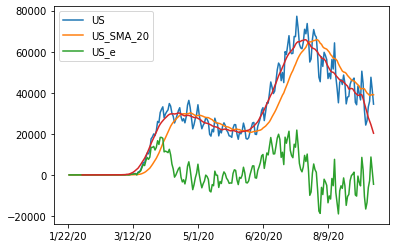

In [56]:
df_US_daily.plot(legend=True)
plt.plot(df_US_daily_SMOOTH)
# Red line denotes the smoothed version
plt.show()


**$\ e$ Power Spectrum**

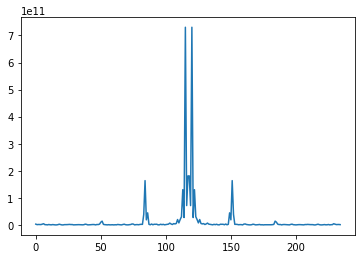

In [70]:
US_e = df_US_daily['US_e'].tolist()
del US_e[0]
t = np. arange(0,len(US_e),1)
a = np.fft.fft(US_e*(-1)**t)
US_e_pwr_spec = a.real ** 2 + a.imag ** 2
plt.plot(US_e_pwr_spec)
plt.show()


**Moving Average Soomthing of China Daily New Cases**

In [29]:
df_China_daily = df_4countries_daily[['China']]
df_China_daily.head(10)

,China
1/22/20,NaN
1/23/20,95.0
1/24/20,277.0
1/25/20,486.0
1/26/20,669.0
1/27/20,802.0
1/28/20,2632.0
1/29/20,578.0
1/30/20,2054.0
1/31/20,1661.0


In [58]:
df_China_daily_SMOOTH = np.convolve(df_China_daily.China, mask, mode="same")
df_China_daily['China_SMA_20'] = df_China_daily.China.rolling(20, min_periods=1).mean()
df_China_daily['China_e'] = df_China_daily['China'] - df_China_daily['China_SMA_20']
df_China_daily.head(20)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,China,China_SMA_20,China_e
1/22/20,NaN,NaN,NaN
1/23/20,95.0,95.000000,0.000000
1/24/20,277.0,186.000000,91.000000
1/25/20,486.0,286.000000,200.000000
1/26/20,669.0,381.750000,287.250000
1/27/20,802.0,465.800000,336.200000
1/28/20,2632.0,826.833333,1805.166667
1/29/20,578.0,791.285714,-213.285714
1/30/20,2054.0,949.125000,1104.875000
1/31/20,1661.0,1028.222222,632.777778


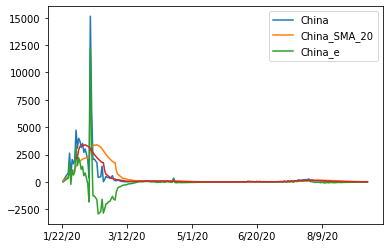

In [59]:
df_China_daily.plot(legend=True)
# Red line denotes the smoothed version
plt.plot(df_China_daily_SMOOTH)
plt.show()

**$\ e$ Power Spectrum**

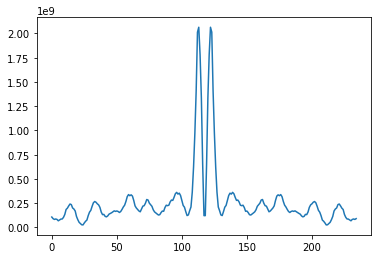

In [71]:
from scipy.fft import fft, ifft
China_e = df_China_daily['China_e'].tolist()
del China_e[0]

b = fft(China_e*(-1)**t)
China_e_pwr_spec = b.real ** 2 + b.imag ** 2
plt.plot(China_e_pwr_spec)
plt.show()


**Moving Average Soomthing of UK Daily New Cases**

In [33]:
df_UK_daily = df_4countries_daily[['UK']]
df_UK_daily.head(10)

,UK
1/22/20,NaN
1/23/20,0.0
1/24/20,0.0
1/25/20,0.0
1/26/20,0.0
1/27/20,0.0
1/28/20,0.0
1/29/20,0.0
1/30/20,0.0
1/31/20,2.0


In [63]:
df_UK_daily_SMOOTH = np.convolve(df_UK_daily.UK, mask, mode="same")
df_UK_daily['UK_SMA_20'] = df_UK_daily.UK.rolling(20, min_periods=1).mean()
df_UK_daily['UK_e'] = df_UK_daily['UK'] - df_UK_daily['UK_SMA_20']
df_UK_daily.head(20)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,UK,UK_SMA_20,UK_e
1/22/20,NaN,NaN,NaN
1/23/20,0.0,0.000000,0.000000
1/24/20,0.0,0.000000,0.000000
1/25/20,0.0,0.000000,0.000000
1/26/20,0.0,0.000000,0.000000
1/27/20,0.0,0.000000,0.000000
1/28/20,0.0,0.000000,0.000000
1/29/20,0.0,0.000000,0.000000
1/30/20,0.0,0.000000,0.000000
1/31/20,2.0,0.222222,1.777778


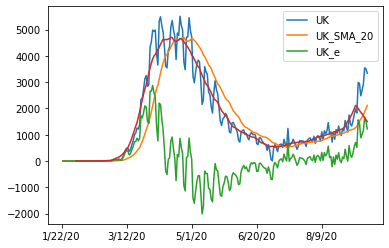

In [64]:
df_UK_daily.plot(legend=True)
# Red line denotes the smoothed version
plt.plot(df_UK_daily_SMOOTH)
plt.show()

**$\ e$ Power Spectrum**

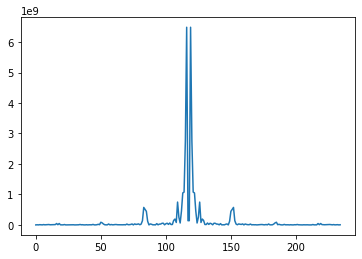

In [72]:
UK_e = df_UK_daily['UK_e'].tolist()
del UK_e[0]

c = np.fft.fft(UK_e*(-1)**t)
UK_e_pwr_spec = c.real ** 2 + c.imag ** 2
plt.plot(UK_e_pwr_spec)
plt.show()

**Moving Average Soomthing of Thailand Daily New Cases**

In [37]:
df_THAI_daily = df_4countries_daily[['Thailand']]
df_THAI_daily.head(10)

,Thailand
1/22/20,NaN
1/23/20,1.0
1/24/20,2.0
1/25/20,2.0
1/26/20,1.0
1/27/20,0.0
1/28/20,6.0
1/29/20,0.0
1/30/20,0.0
1/31/20,5.0


In [65]:
df_THAI_daily_SMOOTH = np.convolve(df_THAI_daily.Thailand, mask, mode="same")
df_THAI_daily['THAI_SMA_20'] = df_THAI_daily.Thailand.rolling(20, min_periods=1).mean()
df_THAI_daily['THAI_e'] = df_THAI_daily['Thailand'] - df_THAI_daily['THAI_SMA_20']
df_THAI_daily.head(20)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Thailand,THAI_SMA_20,THAI_e
1/22/20,NaN,NaN,NaN
1/23/20,1.0,1.000000,0.000000
1/24/20,2.0,1.500000,0.500000
1/25/20,2.0,1.666667,0.333333
1/26/20,1.0,1.500000,-0.500000
1/27/20,0.0,1.200000,-1.200000
1/28/20,6.0,2.000000,4.000000
1/29/20,0.0,1.714286,-1.714286
1/30/20,0.0,1.500000,-1.500000
1/31/20,5.0,1.888889,3.111111


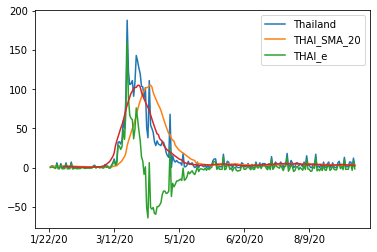

In [68]:
df_THAI_daily.plot(legend=True)
# Red line denotes the smoothed version
plt.plot(df_THAI_daily_SMOOTH)
plt.show()

**$\ e$ Power Spectrum**

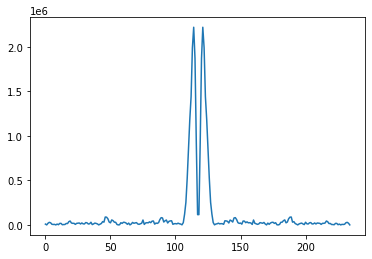

In [73]:
THAI_e = df_THAI_daily['THAI_e'].tolist()
del THAI_e[0]

d = np.fft.fft(THAI_e*(-1)**t)
THAI_e_pwr_spec = d.real ** 2 + d.imag ** 2
plt.plot(THAI_e_pwr_spec)
plt.show()

**Fetch COVID-19 Death Data**

In [76]:
#Fetch COVID-19 Death Data
! if [ ! -e Global_COVID_Death.csv ] ; \
  then wget https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv; \
fi

--2020-09-14 14:39:42--  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182278 (178K) [text/plain]
Saving to: ‘time_series_covid19_deaths_global.csv’

time_series_covid19 100%[===================>] 178.01K  --.-KB/s    in 0.04s   

2020-09-14 14:39:42 (4.03 MB/s) - ‘time_series_covid19_deaths_global.csv’ saved [182278/182278]



In [77]:
#Read data in pandas
df_death = pd.read_csv("time_series_covid19_deaths_global.csv")
df_death.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1294,1298,1307,1312,1312,1328,1344,1354,1363,1363,1370,1375,1375,1375,1375,1385,1385,1385,1387,1389,1397,1401,1401,1402,1402,1402,1402,1406,1409,1409,1409,1409,1412,1415,1418,1420,1420,1420,1420,1420
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,182,188,189,193,199,200,205,208,213,219,225,228,230,232,234,238,240,245,250,254,259,263,266,271,275,280,284,290,296,301,306,312,316,319,321,322,324,327,330,334
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1261,1273,1282,1293,1302,1312,1322,1333,1341,1351,1360,1370,1379,1391,1402,1411,1418,1424,1435,1446,1456,1465,1475,1483,1491,1501,1510,1518,1523,1529,1539,1549,1556,1562,1571,1581,1591,1599,1605,1612
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,52,52,52,52,52,52,52,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,62,64,67,70,75,78,80,80,80,86,86,88,88,90,92,93,94,94,96,100,102,103,105,106,107,107,108,109,112,113,115,117,117,120,124,126,130,131,132,134


In [78]:
df_death = df_death.drop(['Province/State', 'Lat', 'Long'],\
               axis = 1)
df_death.set_index("Country/Region", inplace = True)
df_death = df_death.T
df_death.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,...,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
9/9/20,1420,322,1581,53,126,3,10658,905,3,52,0,6,4,13,701,9,747,555,63,203,4593,7,726,9917,18,40,0,7146,675,9,128539,3,702,56,14,1,43,0,415,247,...,29628,12,833,92,5842,2019,143,7,71,21,58,0,36,39,96,6837,190859,46,3034,393,0,9,1,1,48,0,0,24,1,5,41594,45,366,452,35,192,1,576,300,222
9/10/20,1420,324,1591,53,130,3,10907,906,3,52,0,6,4,13,710,9,748,556,63,207,4634,7,732,9917,18,40,0,7193,680,10,129522,3,706,56,14,1,43,0,415,253,...,29699,12,833,93,5843,2020,147,7,72,21,58,0,37,43,99,6895,191766,48,3079,398,0,9,1,1,48,0,0,24,1,5,41608,45,370,460,35,198,1,580,300,222
9/11/20,1420,327,1599,53,131,3,11148,909,3,52,0,6,4,13,716,9,750,557,65,208,4668,7,738,9919,19,40,0,7250,686,10,130396,3,713,56,14,1,44,0,415,253,...,29747,12,834,93,5846,2020,150,7,72,21,58,0,37,50,103,6951,192979,49,3132,398,0,9,1,1,48,0,0,24,1,5,41614,45,377,468,35,204,1,582,306,224
9/12/20,1420,330,1605,53,132,3,11263,911,3,52,0,6,4,13,723,9,754,559,67,211,4702,7,744,9923,19,40,0,7297,690,10,131210,3,717,56,16,1,44,0,415,253,...,29747,12,834,93,5846,2020,152,7,72,21,58,0,37,51,107,6999,193693,52,3206,399,0,9,1,1,48,0,0,24,1,5,41623,45,384,477,35,210,1,582,312,224
9/13/20,1420,334,1612,53,134,3,11352,916,3,52,0,6,4,13,729,9,756,562,67,212,4733,7,750,9925,19,40,0,7344,696,10,131625,3,720,56,24,1,44,0,415,253,...,29747,12,835,93,5846,2021,155,7,72,21,58,0,37,53,107,7056,194071,55,3239,399,0,9,1,1,48,0,0,24,1,5,41628,45,390,485,35,221,1,583,312,224


In [79]:
df_US_death = df_death[['US']]
US_death_cumulative = df_US_death.sum(axis=1)

df_China_death = df_death[['China']]
China_death_cumulative = df_China_death.sum(axis=1)

df_UK_death = df_death[['United Kingdom']]
UK_death_cumulative = df_UK_death.sum(axis=1)

df_THAI_death = df_death[['Thailand']]
THAI_death_cumulative = df_THAI_death.sum(axis=1)

df_4countries_death = pd.concat([US_death_cumulative,China_death_cumulative,UK_death_cumulative,THAI_death_cumulative], axis=1)
df_4countries_death.rename(columns={0:'US', 1:'China', 2:'UK', 3:'Thailand'}, inplace=True)

df_4countries_death.tail() 

,US,China,UK,Thailand
9/9/20,190859,4733,41683,58
9/10/20,191766,4733,41697,58
9/11/20,192979,4733,41703,58
9/12/20,193693,4734,41712,58
9/13/20,194071,4734,41717,58


**Fatality Rate**

In [80]:
# Fatality Rate for 4 chosen countries

country_specific_fatality_rate = df_4countries_death.loc['9/10/20']/df_4countries.loc['9/10/20']

print (country_specific_fatality_rate)

US          0.029982
China       0.052515
UK          0.115650
Thailand    0.016758
Name: 9/10/20, dtype: float64


In [81]:
# Global Fatality Rate

tot_death = df_death.iloc[232:233].sum(axis=1)

tot_cases = df.iloc[232:233].sum(axis=1)

a = pd.concat([tot_death,tot_cases], axis=1)
a.rename(columns={0:'Total Deaths', 1:'Total Cases'}, index={'9/10/20':''}, inplace=True)
a['Overall Fatality Rate'] = a['Total Deaths'] / a['Total Cases']
a.head()


,Total Deaths,Total Cases,Overall Fatality Rate
,909479,28161434,0.032295


In [82]:
df_US_pair = pd.concat([df_US_daily,US_death_cumulative,US_cumulative], axis=1)
df_US_pair.rename(columns={0:'Cumulative_Deaths', 1:'Cumulative_Cases'}, inplace=True)
df_US_pair['FR'] = df_US_pair['Cumulative_Deaths'] / df_US_pair['Cumulative_Cases']
df_US_pair.head()

,US,US_SMA_20,US_e,Cumulative_Deaths,Cumulative_Cases,FR
1/22/20,NaN,NaN,NaN,0,1,0.0
1/23/20,0.0,0.000000,0.000000,0,1,0.0
1/24/20,1.0,0.500000,0.500000,0,2,0.0
1/25/20,0.0,0.333333,-0.333333,0,2,0.0
1/26/20,3.0,1.000000,2.000000,0,5,0.0


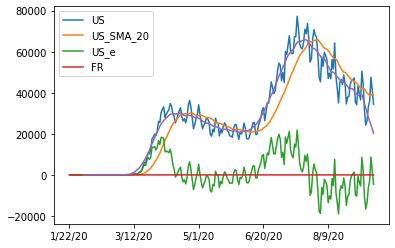

In [83]:
df_US_pair.US.plot(legend=True)
df_US_pair.US_SMA_20.plot(legend=True)
df_US_pair.US_e.plot(legend=True)
df_US_pair.FR.plot(legend=True)
plt.plot(df_US_daily_SMOOTH)
plt.show()

In [84]:
df_China_pair = pd.concat([df_China_daily,China_death_cumulative,China_cumulative], axis=1)
df_China_pair.rename(columns={0:'Cumulative_Deaths', 1:'Cumulative_Cases'}, inplace=True)
df_China_pair['FR'] = df_China_pair['Cumulative_Deaths'] / df_China_pair['Cumulative_Cases']
df_China_pair.head()

,China,China_SMA_20,China_e,Cumulative_Deaths,Cumulative_Cases,FR
1/22/20,NaN,NaN,NaN,17,548,0.031022
1/23/20,95.0,95.00,0.00,18,643,0.027994
1/24/20,277.0,186.00,91.00,26,920,0.028261
1/25/20,486.0,286.00,200.00,42,1406,0.029872
1/26/20,669.0,381.75,287.25,56,2075,0.026988


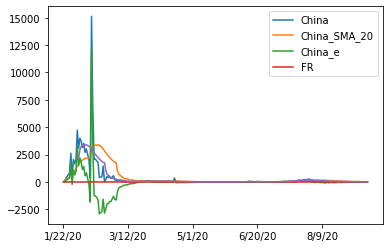

In [86]:
df_China_pair.China.plot(legend=True)
df_China_pair.China_SMA_20.plot(legend=True)
df_China_pair.China_e.plot(legend=True)
df_China_pair.FR.plot(legend=True)
plt.plot(df_China_daily_SMOOTH)
plt.show()

In [88]:
df_UK_pair = pd.concat([df_UK_daily,UK_death_cumulative,UK_cumulative], axis=1)
df_UK_pair.rename(columns={0:'Cumulative_Deaths', 1:'Cumulative_Cases'}, inplace=True)
df_UK_pair['FR'] = df_UK_pair['Cumulative_Deaths'] / df_UK_pair['Cumulative_Cases']
df_UK_pair.head()

,UK,UK_SMA_20,UK_e,Cumulative_Deaths,Cumulative_Cases,FR
1/22/20,NaN,NaN,NaN,0,0,NaN
1/23/20,0.0,0.0,0.0,0,0,NaN
1/24/20,0.0,0.0,0.0,0,0,NaN
1/25/20,0.0,0.0,0.0,0,0,NaN
1/26/20,0.0,0.0,0.0,0,0,NaN


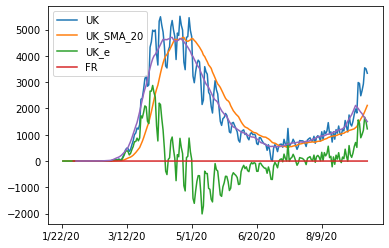

In [89]:
df_UK_pair.UK.plot(legend=True)
df_UK_pair.UK_SMA_20.plot(legend=True)
df_UK_pair.UK_e.plot(legend=True)
df_UK_pair.FR.plot(legend=True)
plt.plot(df_UK_daily_SMOOTH)
plt.show()

In [90]:
df_THAI_pair = pd.concat([df_THAI_daily,THAI_death_cumulative,THAI_cumulative], axis=1)
df_THAI_pair.rename(columns={0:'Cumulative_Deaths', 1:'Cumulative_Cases'}, inplace=True)
df_THAI_pair['FR'] = df_THAI_pair['Cumulative_Deaths'] / df_THAI_pair['Cumulative_Cases']
df_THAI_pair.head()

,Thailand,THAI_SMA_20,THAI_e,Cumulative_Deaths,Cumulative_Cases,FR
1/22/20,NaN,NaN,NaN,0,2,0.0
1/23/20,1.0,1.000000,0.000000,0,3,0.0
1/24/20,2.0,1.500000,0.500000,0,5,0.0
1/25/20,2.0,1.666667,0.333333,0,7,0.0
1/26/20,1.0,1.500000,-0.500000,0,8,0.0


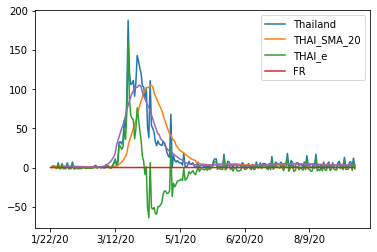

In [93]:
df_THAI_pair.Thailand.plot(legend=True)
df_THAI_pair.THAI_SMA_20.plot(legend=True)
df_THAI_pair.THAI_e.plot(legend=True)
df_THAI_pair.FR.plot(legend=True)
plt.plot(df_THAI_daily_SMOOTH)
plt.show()